In [1]:
#tem packages a mais pq nqs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import os
from sklearn.preprocessing import StandardScaler
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('ultimate_dataset.csv')
df.drop(columns='Unnamed: 0', inplace = True)
df.reset_index(inplace = True, drop = True)
df

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,BarService,Age,Gender,avg_satisfaction,avg_accomodation,avg_reception,avg_catering,avg_key_factors,RewardPoints_bins,Age_bin
0,churn,yes,business,single,4907.0,3.0,4.0,1.0,4.0,4.0,...,4.0,48,F,3.285714,3.2,3.6,2.5,3.5,2,Mid_adult
1,nochurn,yes,business,single,6724.0,1.0,1.0,1.0,1.0,5.0,...,2.0,57,M,3.142857,3.8,3.2,1.5,3.0,2,Older_adult
2,churn,yes,business,single,4365.0,3.0,3.0,3.0,3.0,1.0,...,1.0,49,M,2.714286,2.6,3.0,2.0,3.0,1,Mid_adult
3,nochurn,yes,leisure,double,3849.0,1.0,1.0,1.0,1.0,4.0,...,3.0,29,F,3.142857,3.4,3.6,2.0,2.5,1,Young_adult
4,nochurn,yes,business,single,5376.0,2.0,2.0,3.0,2.0,5.0,...,5.0,33,M,3.571429,3.6,3.4,4.0,3.5,2,Young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,churn,no,business,double,4968.0,2.0,0.0,2.0,2.0,3.0,...,3.0,34,F,2.714286,3.2,2.2,2.5,3.0,2,Young_adult
15582,churn,no,business,double,4970.0,3.0,3.0,3.0,3.0,5.0,...,5.0,22,F,3.571429,3.2,4.0,4.0,3.0,2,Young_adult
15583,nochurn,yes,business,single,4046.0,1.0,1.0,1.0,1.0,3.0,...,4.0,58,M,3.214286,3.2,3.8,2.5,2.5,1,Older_adult
15584,nochurn,yes,leisure,double,5155.0,4.0,3.0,4.0,4.0,5.0,...,5.0,30,M,4.071429,4.4,4.0,4.5,3.0,2,Young_adult


In [3]:
df.drop_duplicates(inplace = True)

In [4]:
cl = df[['TypeTravel', 'Churn','Longevity']]

In [5]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15585
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TypeTravel  15586 non-null  object
 1   Churn       15586 non-null  object
 2   Longevity   15586 non-null  object
dtypes: object(3)
memory usage: 487.1+ KB


In [7]:
#sns.histplot(data=cl, x='Age')

In [8]:
cl2 = pd.get_dummies(cl, drop_first = True)

In [9]:
cl2

,TypeTravel_leisure,Churn_nochurn,Longevity_yes
0,0,0,1
1,0,1,1
2,0,0,1
3,1,1,1
4,0,1,1
...,...,...,...
15581,0,0,0
15582,0,0,0
15583,0,1,1
15584,1,1,1


In [10]:
cl2.corr()

,TypeTravel_leisure,Churn_nochurn,Longevity_yes
TypeTravel_leisure,1.000000,-0.111528,0.310139
Churn_nochurn,-0.111528,1.000000,0.290229
Longevity_yes,0.310139,0.290229,1.000000


In [11]:
cl2.describe().T

,count,mean,std,min,25%,50%,75%,max
TypeTravel_leisure,15586.0,0.310022,0.462517,0.0,0.0,0.0,1.0,1.0
Churn_nochurn,15586.0,0.543757,0.498098,0.0,0.0,1.0,1.0,1.0
Longevity_yes,15586.0,0.815604,0.387819,0.0,1.0,1.0,1.0,1.0


In [12]:
cl2 = pd.get_dummies(cl, drop_first = True)

In [13]:
cl2.corr()

,TypeTravel_leisure,Churn_nochurn,Longevity_yes
TypeTravel_leisure,1.000000,-0.111528,0.310139
Churn_nochurn,-0.111528,1.000000,0.290229
Longevity_yes,0.310139,0.290229,1.000000


Text(0.5, 1.0, 'Correlation Heats')

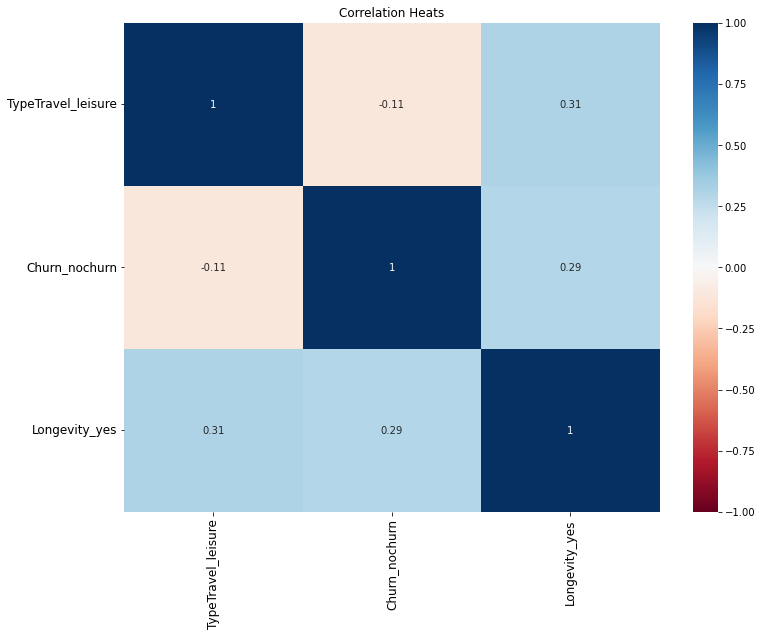

In [14]:
plt.figure(figsize=(12,9))
s= sns.heatmap(cl2.corr(),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heats')

In [15]:
scaler = StandardScaler()
cl2_stand = scaler.fit_transform(cl2)

In [16]:
hier_clust = linkage(cl2_stand, method = 'ward')

In [17]:
cl2_stand

array([[-0.67031424, -1.09170303,  0.47548458],
       [-0.67031424,  0.91600003,  0.47548458],
       [-0.67031424, -1.09170303,  0.47548458],
       ...,
       [-0.67031424,  0.91600003,  0.47548458],
       [ 1.49183762,  0.91600003,  0.47548458],
       [-0.67031424, -1.09170303,  0.47548458]])

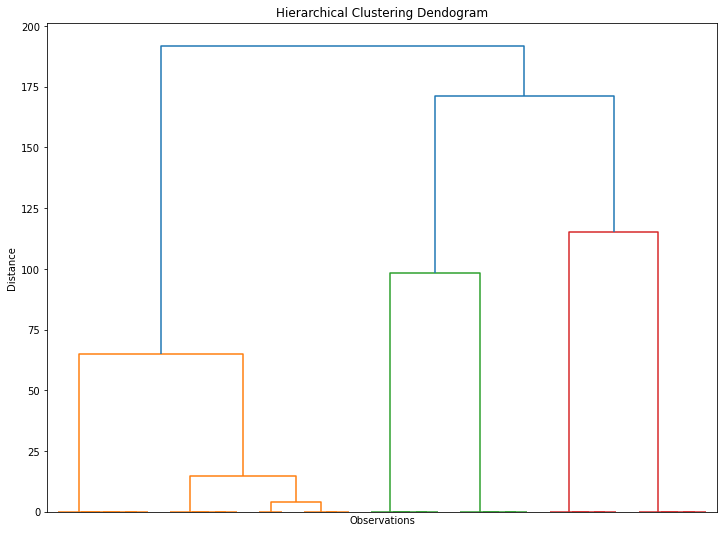

In [18]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
         truncate_mode = 'level',
         p=5,
         show_leaf_counts= False,
         no_labels= True)
         #color_threshold= 0)

plt.show()

In [19]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [20]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(cl2_stand)
    
    
    ssd.append(model.inertia_) ##SSD point to cluster center

C:\Users\ricar\AppData\Local\Temp/ipykernel_6628/591438661.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  model.fit(cl2_stand)


In [21]:
ssd

[28359.991000938793,
 13685.694176749274,
 7040.966139104713,
 2222.143466246001,
 111.13493683101385,
 7.389931164577103,
 4.357966668027755e-25,
 4.195610958605185e-25]

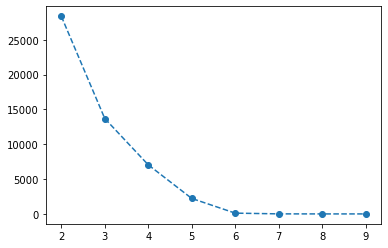

In [22]:
plt.plot(range(2,10), ssd, 'o--')

<AxesSubplot:>

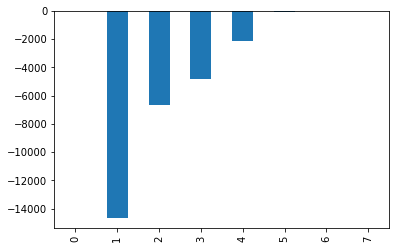

In [23]:
pd.Series(ssd).diff().plot(kind='bar')

In [24]:
model = KMeans(n_clusters=3)

In [25]:
cluster_labels = model.fit_predict(cl2_stand)

In [26]:
cluster_labels

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
cl2['Cluster'] = cluster_labels

In [28]:
cl2

,TypeTravel_leisure,Churn_nochurn,Longevity_yes,Cluster
0,0,0,1,1
1,0,1,1,1
2,0,0,1,1
3,1,1,1,0
4,0,1,1,1
...,...,...,...,...
15581,0,0,0,2
15582,0,0,0,2
15583,0,1,1,1
15584,1,1,1,0


In [29]:
cl2.corr()['Cluster'].iloc[:-1].sort_values()

TypeTravel_leisure   -0.840057
Longevity_yes        -0.773496
Churn_nochurn        -0.090296
Name: Cluster, dtype: float64

<AxesSubplot:>

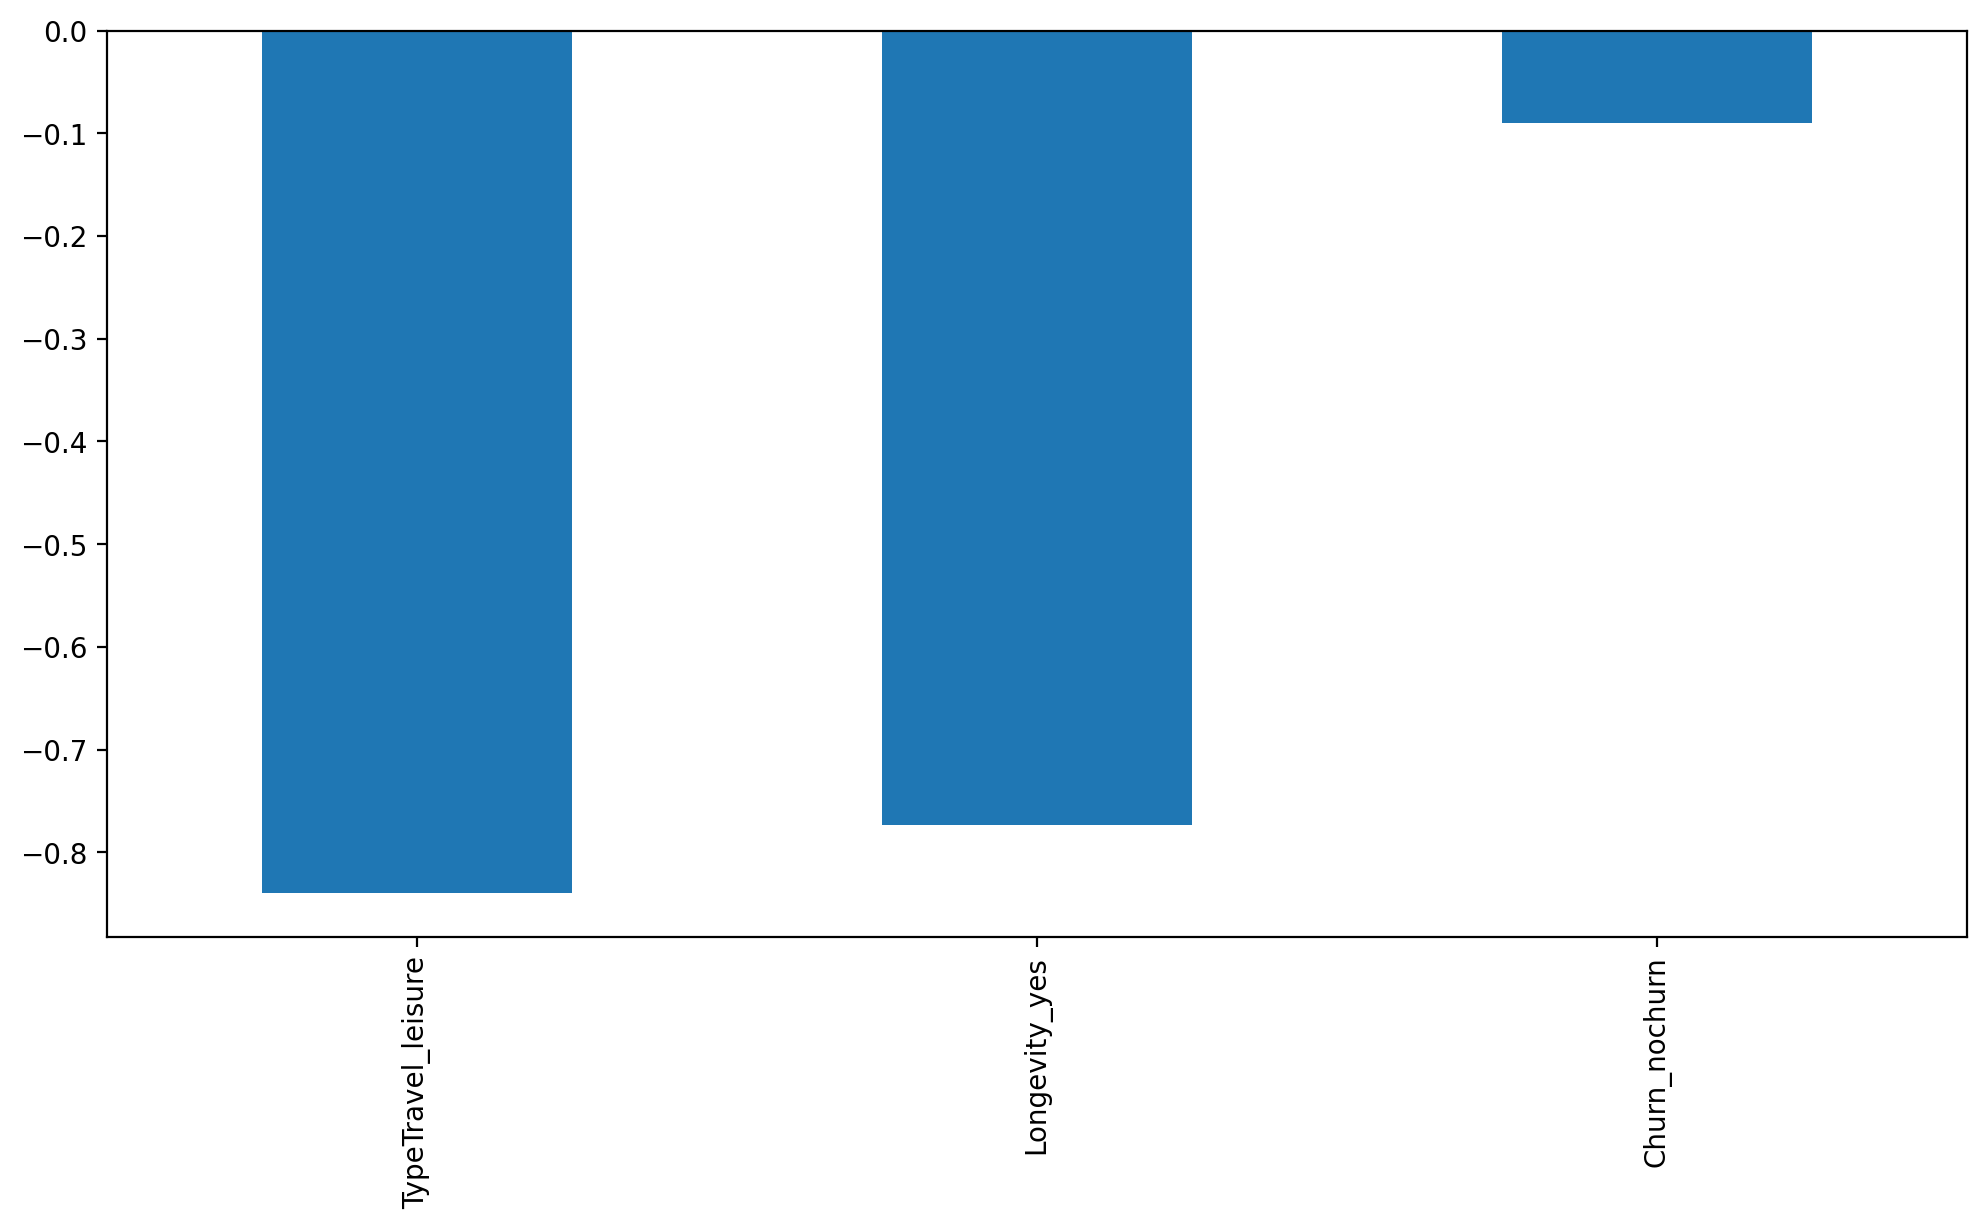

In [30]:
plt.figure(figsize=(12,6), dpi=200)
cl2.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [31]:
cl2

,TypeTravel_leisure,Churn_nochurn,Longevity_yes,Cluster
0,0,0,1,1
1,0,1,1,1
2,0,0,1,1
3,1,1,1,0
4,0,1,1,1
...,...,...,...,...
15581,0,0,0,2
15582,0,0,0,2
15583,0,1,1,1
15584,1,1,1,0


In [32]:
cl3 = cl2.groupby(['Cluster']).mean()

In [33]:
cl3

,TypeTravel_leisure,Churn_nochurn,Longevity_yes
Cluster,,,
0,1.000000,0.462770,1.0
1,0.000000,0.703568,1.0
2,0.008351,0.239736,0.0


In [52]:
cl3['Count'] = cl2.groupby(['Cluster']).count()['TypeTravel_leisure']

In [53]:
cl3

,TypeTravel_leisure,Churn_nochurn,Longevity_yes,Count
Cluster,,,,
0,1.000000,0.462770,1.0,4808
1,0.000000,0.703568,1.0,7904
2,0.008351,0.239736,0.0,2874


In [56]:
cl3['Relative_Freq'] = cl3['Count']/cl3['Count'].sum()

In [57]:
cl3

,TypeTravel_leisure,Churn_nochurn,Longevity_yes,Count,pobs,Relative_Freq
Cluster,,,,,,
0,1.000000,0.462770,1.0,4808,0.308482,0.308482
1,0.000000,0.703568,1.0,7904,0.507122,0.507122
2,0.008351,0.239736,0.0,2874,0.184396,0.184396


In [ ]:
#pode estar tudo trocado por correr o codigo
cl3.rename({0: 'Middle Age Working Men',
           3:'Young Males on Leisure',
           1: 'Middle Age Working Female',
           2: 'Older Age Female on Leisure'})

In [ ]:
# droppar os RewardPoints aqui, n fazem nada
cl3 = cl3.rename_axis('Labels').reset_index()

In [ ]:
cl2['Labels'] = cl2['Cluster'].map({0: 'Middle Age Working Men',
           3:'Young Males on Leisure',
           1: 'Middle Age Working Female',
           2: 'Older Age Female on Leisure'})

In [ ]:
cl2

In [ ]:
cluster0 = cl2[cl2.Cluster==0]
cluster1 = cl2[cl2.Cluster==1]
cluster2 = cl2[cl2.Cluster==2]
cluster3 = cl2[cl2.Cluster==3]


In [ ]:
sns.histplot(cluster1['Age'],color='red',label='Young Males on Leisure - Cluster 0', bins = 10)

sns.histplot(cluster2['Age'],color='blue',label='Middle Age Working Men - Cluster 2', bins = 10)

plt.legend()

In [ ]:
sns.histplot(cluster0['Age'],color='yellow',label='Middle Age Working Female - Cluster 1', bins = 10)
sns.histplot(cluster3['Age'],color='green',label='Older Age Female on Leisure - Cluster 2', bins = 10)
plt.legend()

In [ ]:
sns.histplot(cluster0['TypeTravel_leisure'],color='yellow',label='Middle Age Working Female - Cluster 1')
sns.histplot(cluster3['TypeTravel_leisure'],color='green',label='Older Age Female on Leisure - Cluster 2')
plt.legend()

In [ ]:
sns.countplot(x=cluster2['TypeTravel_leisure'], palette="ch:.25", data=cluster2)
plt.legend()

In [ ]:
sns.countplot(x=cl2['TypeTravel_leisure'], palette="ch:.25", data=cluster3)
plt.legend()